## 9. 使用Pandas进行数据分析

Pandas(Python Data Analysis Library)是应用最广泛的数据分析工具包, 几乎所有使用Python做分析的场景都会用到Pandas. 作为一个建立在NumPy的基础之上数据分析工具，它的基本数据结构被称为**DataFrame**. DataFrame能够帮助用户方便得按照表格形式(行列组成)存储和操作数据

导入Pandas Package

In [1]:
import numpy as np #一般也会同时导入NumPy
import pandas as pd #Pandas一般简称pd
import matplotlib.pyplot as plt #matplotlib是用来做图的工具包

## 9.1 Pandas 基本操作



**Pandas Series**

- Series是Pandas中最基础的数据结构. 它实际上**带索引的一维数组**(可以看成加强版的NumPy数组), 由两部分组成:
    - 索引(index): 对应每个数据元素，用来方便查找，默认索引是从0开始：[0, 1, 2, 3......n]
    - 数据元素
- Series底层结构是数组，所以具有运算速度快的特点，特别对于数据类型一致的情况
- 通过pandas.Series()创建一个Series:

In [5]:
basic_series = pd.Series(["a","b","c"])
print(basic_series)

0    a
1    b
2    c
dtype: object


In [6]:
type(basic_series)

pandas.core.series.Series

In [7]:
#Series.values把数据元素按数组形式返回
basic_series.values

array(['a', 'b', 'c'], dtype=object)

In [8]:
#Series.values返回Series的index
basic_series.index

RangeIndex(start=0, stop=3, step=1)

通过索引来查找元素

In [9]:
basic_series[2]

'c'

In [10]:
basic_series.values

array(['a', 'b', 'c'], dtype=object)

**Pandas DataFrame**

- Pandas中**DataFrame是由多个Series组合在在一起并共享一个索引(行索引)而构成的**，每个单独的Series被称为列(column)

- 虽然每列(也就是每个Series)中的数据格式可以不同，但是为了更高效得分析和处理数据，一般情况下每列的数据类型应该相同

- 有很多方法创建DataFrame, 下面的方法中通过dictionary(字典)来创建。在dictionary中，每个key(键)代表一个column, key的value对应column中的数据元素
- 如果没有特别创建，默认情况下的索引(行索引)根据位置从0开始:[0,1,2,3......n]

In [11]:
sample_df = pd.DataFrame({"Instructors": ["Ken","Steven", "Xing"], "Heights": [80,70,68], "Locations": ["ON", "BC", "QC"]})
sample_df

,Instructors,Heights,Locations
0,Ken,80,ON
1,Steven,70,BC
2,Xing,68,QC


通过使用方括号选取DataFrame中的某列`df['column_name']`

In [12]:
a=sample_df['Heights']

In [13]:
type(a)

pandas.core.series.Series

#### 练习 1

1.1 创建一个DataFrame叫 `first_df`包括列`["staff","colors","age"]` 以及每列对应的值 `["Leo","Dan","Cindy"]`, `["blue","green","red"]`, 以及 `[29,21,20]`. 使用默认行索引

1.2 将创建好的DataFrame中的列`staff`赋值给变量`staff_new`.

In [14]:
#1.1答案:
first_df = pd.DataFrame({"staff": ["Leo","Dan","Cindy"], "colors": ["blue","green","red"], "age":[29,21,20]})
first_df

,staff,colors,age
0,Leo,blue,29
1,Dan,green,21
2,Cindy,red,20


In [15]:
#1.2答案:
staff_new = first_df['staff']
staff_new

0      Leo
1      Dan
2    Cindy
Name: staff, dtype: object

**索引和列的选取**

DataFrame或者Series的index属性可以返回行索引:
    - 默认行索引是从0开始：[0, 1, 2, 3......n]

In [16]:
sample_df.index

RangeIndex(start=0, stop=3, step=1)

在创建DataFrame时可以创建特定的行索引,并通过赋值语句对name属性赋值，从而创建行索引的名字

In [17]:
sample_df_with_index = pd.DataFrame({"Heights": [80,70,68], "Locations": ["ON", "BC", "QC"]}, index=["Ken","Steven", "Xing"])
sample_df_with_index.index.name = "Instructors"
sample_df_with_index

,Heights,Locations
Instructors,,
Ken,80,ON
Steven,70,BC
Xing,68,QC


也可以通过赋值语句对index属性赋值，从而覆盖已有的索引

In [18]:
sample_df.index =  [10000,10001,10002]
sample_df

,Instructors,Heights,Locations
10000,Ken,80,ON
10001,Steven,70,BC
10002,Xing,68,QC


同样，DataFrame或者Series的columns属性可以返回每一列的标题:

In [19]:
sample_df.columns

Index(['Instructors', 'Heights', 'Locations'], dtype='object')

使用DataFrame.rename()函数可以改变column的名字：

In [20]:
sample_df.rename(columns = {'Instructors': '姓名', 'Heights': '身高'})

,姓名,身高,Locations
10000,Ken,80,ON
10001,Steven,70,BC
10002,Xing,68,QC


使用方括号选取列时，单个和双括号的区别
    - 单个方括号返回Series
    - 双方括号返回DataFrame

In [21]:
sample_df['Locations']

10000    ON
10001    BC
10002    QC
Name: Locations, dtype: object

In [22]:
type(sample_df['Locations'])

pandas.core.series.Series

In [23]:
sample_df[['Locations']]

,Locations
10000,ON
10001,BC
10002,QC


In [24]:
type(sample_df[['Locations']])

pandas.core.frame.DataFrame

因为Series是一维的，所以使用单括号返回Series时，里面只能放一个column

In [25]:
sample_df['Locations','Instructors']

KeyError: ('Locations', 'Instructors')

## 9.2 读取数据

csv是最常用的数据文件格式，在Python中使用函数**pandas.read_csv()**可以很方便得读取csv文件, 并导入DataFrame中

- pandas.read_csv()
    - 由于csv文件中数据、格式等导致杂乱无章，所以read_csv()函数的参数达50多个。
    - 唯一必需的参数是第一个参数，即文件名字或者包括文件名字的路径
    - sep/delimiter参数是文件的分隔符，如果没提供，默认是逗号,
    - header: 告诉Python哪一行作为列的标题，默认时header=0,也就是第一行为列的标题

使用参数nrows只读取指定的行数：
    - nrows: 指定读取的行数

In [2]:
#只读取文件的前9条记录，并且赋值给一个变量df_part
df_part = pd.read_csv("application.csv", nrows=9)
df_part

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
type(df_part)

pandas.core.frame.DataFrame

Python是在内存中运行的，所以在读取数据时，数据会被全部导入内存中，如果数据过大可能造成内存不足而失败。

可以通过参数*chunksize*将数据分块读取和操作：
    - chunksize：指定每次读取多少行

In [4]:
for gm_chunk in pd.read_csv('application.csv',chunksize=1000):
    print(gm_chunk.shape)

(1000, 122)
(1000, 122)
(1000, 122)
(551, 122)


使用参数index_col指定某一行作为列的索引：

- index_col: 默认为None

In [5]:
df_part2 = pd.read_csv("application.csv", nrows=9, index_col = 'SK_ID_CURR')
df_part2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000,312682.5,29686.5,297000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500,513000.0,21865.5,513000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100008,0,Cash loans,M,N,Y,0,99000,490495.5,27517.5,454500,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
100009,0,Cash loans,F,Y,Y,1,171000,1560726.0,41301.0,1395000,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
100010,0,Cash loans,M,Y,Y,0,360000,1530000.0,42075.0,1530000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100011,0,Cash loans,F,N,Y,0,112500,1019610.0,33826.5,913500,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#将整个文件读入，并且赋值给一个变量df
df = pd.read_csv("application.csv")

接下来，让我们通过Pandas对这个数据进行深入分析

数据背景：某东南亚互联网金融公司个人信贷产品(类似于支付宝花呗)的申请信息

## 9.3 检查数据

数据分析的第一步就是对数据进行初步的检查，从而对数据有个大致的了解，同时发现数据中存在的问题，防止在后续的深入分析过程中产生错误的结果

   - **DataFrame.shape**属性可以告诉我们数据的形状，也就是行数和列数
           - 先返回行数再返回列数

In [7]:
df.shape

(3551, 122)

In [98]:
df[['SK_ID_CURR','TARGET', 'CODE_GENDER' ]].head(20).to_csv('sample.csv', index=False)

   - **DataFrame.colums**属性返回列的标题
   - DataFrame.colums返回一个对象，可以通过tolist()函数将其转化成列表，方便后续的分析和使用   

In [8]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
col_list = df.columns.tolist()
print(col_list)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

   - **DataFrame.dtypes**属性返回每列的数据格式，以Series的形式存在

In [10]:
pd.set_option('display.max_rows', 122)
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


- **DataFrame.info()**方法返回DataFrame的基本信息，包括行索引的格式，每列的格式，非空值的信息，以及内存使用量
    - 使用参数verbose = True，让info()返回每列的详细信息 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(62), int64(44), object(16)
memory usage: 3.3+ MB


In [12]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED              

- **DataFrame.head(n)**方法返回从第一条记录起的n条记录，如果n没有提供默认返回5条记录
    - 可以通过DataFrame.head(n)对数据的样子有个基本了解

In [13]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


*默认情况下，notebook只显示60行，20列数据，可以通过 `pd.set_option()`, 比如 `pd.set_option("display.max_rows",100)` 或者`pd.set_option("display.max_columns",100)`来改变默认的显示数目*

- **DataFrame.describe()**方法返回变量(列)的描述性统计信息
    - 根据变量是否是数值型，返回不同形式的结果
    - 对于**数值型变量(int/float)**，结果会返回每个变量的计数(count), 平均值(mean), 标准偏差(std), 最小值(min), 最大值(max)，以及低分位数，%50分位数，高分位数。(默认情况下低分位数返回25%分位数，高分位数返回75%分位数)
    - 对于**对象型变量(object:string/timestamps)**，结果会返回每个变量的计数(count), 不同值的个数(unique), 频率最高的值(top), 频率最高的值的出现频率(freq)
    - 如果直接对整个DataFrame使用，而DataFrame有含有不同格式，则只会返回数值型变量的统计结果
    - 参数percentiles控制想对数值型变量返回的分位数，默认不提供时是[.25, .5, .75]

In [14]:
#数值型变量：
df["AMT_CREDIT"].describe()

count    3.551000e+03
mean     6.028647e+05
std      4.037052e+05
min      4.500000e+04
25%      2.736360e+05
50%      5.099220e+05
75%      8.086500e+05
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64

In [15]:
#改变分位数，帮助是否有判断极值情况：
df["AMT_CREDIT"].describe(percentiles=[.1, .25, .5, .75, .90, .99])

count    3.551000e+03
mean     6.028647e+05
std      4.037052e+05
min      4.500000e+04
10%      1.800000e+05
25%      2.736360e+05
50%      5.099220e+05
75%      8.086500e+05
90%      1.133748e+06
99%      1.945899e+06
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64

In [16]:
#对象型变量
df["NAME_CONTRACT_TYPE"].describe()

count           3551
unique             2
top       Cash loans
freq            3210
Name: NAME_CONTRACT_TYPE, dtype: object

In [17]:
#对整个DataFrame使用
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3551.000000,3551.000000,3551.000000,3.551000e+03,3.551000e+03,3551.000000,3.550000e+03,3551.000000,3551.000000,3551.000000,...,3551.000000,3551.000000,3551.000000,3551.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,102073.344128,0.079977,0.405238,1.688150e+05,6.028647e+05,27245.390031,5.432948e+05,0.021041,-16068.529992,65432.273162,...,0.006477,0.000563,0.000563,0.000282,0.010131,0.008497,0.035294,0.259804,0.274510,1.889542
std,1199.429620,0.271297,0.716773,9.996192e+04,4.037052e+05,14548.286638,3.724547e+05,0.014160,4347.082715,142618.849778,...,0.080230,0.023729,0.023729,0.016781,0.103369,0.122333,0.194891,0.924487,0.615643,1.862963
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101018.500000,0.000000,0.000000,1.125000e+05,2.736360e+05,16753.500000,2.385000e+05,0.010006,-19643.000000,-2721.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102077.000000,0.000000,0.000000,1.440000e+05,5.099220e+05,25101.000000,4.500000e+05,0.018850,-15871.000000,-1206.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,103108.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34868.250000,6.795000e+05,0.028663,-12421.000000,-283.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,104147.000000,1.000000,7.000000,1.935000e+06,2.517300e+06,135936.000000,2.254500e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,16.000000,4.000000,11.000000


- **Series.unique()**方法返回一个Series(某一列)的不同值

In [18]:
df["NAME_CONTRACT_TYPE"].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

- **Series.nunique()**方法返回一个Series(某一列)有几个不同的值

In [19]:
df["NAME_CONTRACT_TYPE"].nunique()

2

- **Series.value_counts()**方法一个Series((某一列)不同值和对应的出现频率

    - 一般对于字符型变量(商业分析中的分类变量)使用value_counts来分析不同分类的出现频率
    - 很少对数值型变量使用，除非所含的不同值不多 

In [20]:
df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         3210
Revolving loans     341
Name: NAME_CONTRACT_TYPE, dtype: int64

## 9.4 清理数据

清理数据也是数据分析重要的环节之一，如果数据没有被很好得清理，就会造成错误的分析结果，从而影响商业决策

常见的清理方式：
    - 缺失值的处理
    - 重复值的处理

**识别缺失值**

 - 通过**DataFrame.isnull**的方法来识别是否有空值，如果为空返回True,否则返回False 

 - 直接用在DataFrame之后，就会返回一个只有布林值(Boolean)的DataFrame

In [21]:
df.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


使用**.sum()**对所有的True和False进行汇总，然后返回每列的缺失值数目

In [22]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    1
NAME_TYPE_SUITE                   11
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                     2352
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

.value_counts()默认时会自动去掉缺失值，通过参数dropna=False在结果中包括缺失值

In [23]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      1109
Laborers                  622
Sales staff               392
Core staff                315
Managers                  232
Drivers                   226
High skill tech staff     126
Accountants               114
Medicine staff            105
Security staff             80
Cooking staff              73
Cleaning staff             41
Private service staff      34
Low-skill Laborers         32
Secretaries                18
Waiters/barmen staff        9
Realty agents               9
HR staff                    8
IT staff                    6
Name: OCCUPATION_TYPE, dtype: int64

缺失值的处理：
   - 缺失值填充
   - 创建缺失值的指示列(indicator)
   - 删除

**缺失值的处理要谨慎，根据业务的需求具体而定**

- DataFrame.dropna(): 去除缺失值
    - 参数axis = 0('index')或者1('column')：默认为0，代表删除含有缺失值的行；1代表删除缺失值的列
    - 参数how = 'any'或者'all': 默认为'any', 代表只要有任意一个缺失值，整个行或者列会被删除；'all'代表某一行或者列全部为缺失才会被删除
    - 参数inplace = True或者Falase: 默认为False, 代表只返回被删除新的DataFrame但不会改变原来的; True时会改变原来的DataFrame,而只会返回None - *慎重使用*

In [24]:
#只要某一行有任意值为缺失，一行就会被全部删除
df.dropna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,Cash loans,M,Y,Y,0,315000.0,90000.0,4504.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
316,100363,0,Cash loans,F,Y,Y,1,360000.0,493497.0,48942.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
323,100371,0,Cash loans,F,Y,Y,1,450000.0,808650.0,31464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
328,100376,0,Cash loans,M,Y,Y,0,360000.0,254700.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
#并不会改变本身的DataFrame
df.shape

(3551, 122)

In [26]:
#没有一条记录是全部缺失的
df.dropna(how = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


识别重复值：
- DataFrame.duplicated(): 返回一个含有布林值(Boolean)的Series
    - 对于每条记录，如果是重复的则返回True,否则为False
    - 参数keep = 'first'或者'last'或者False 默认值为'first'表明对于重复情况，除了第一次出现的记录以外，剩下的重复记录都会返回True; False则会让所有重复记录都返回True
    - 参数subset可以接收列的标题，然后根据指定的列来判断重复情况， 比如subset = ['column1', 'column2']
    - 参数inplace = True或者Falase: 默认为False, 代表只返回新的DataFrame但不会改变原来的; True时会改变原来的DataFrame,而只会返回None - *慎重使用*

In [27]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3546    False
3547    False
3548    False
3549    False
3550    False
Length: 3551, dtype: bool

In [28]:
#灵活使用.sum()判断有多少个重复
df.duplicated().sum()

0

In [29]:
df.duplicated(subset = ['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])

0       False
1       False
2       False
3        True
4        True
        ...  
3546     True
3547     True
3548     True
3549     True
3550     True
Length: 3551, dtype: bool

重复值的处理：
   - 删除完全重复的
   - 根据不同的信息来定义重复，有针对性的保留或者删除

**重复值的处理要谨慎，根据业务的需求具体而定**

- 使用DataFrame.drop_duplicates()删除重复值，并返回一个新的DataFrame
    - 参数keep = 'first'或者'last'或者False 默认值为'first'表明对于重复情况，除了第一次出现的记录以外，剩下的重复记录都会被删除; False则会删除所有重复记录
    - 参数subset可以接收列的标题，然后根据指定的列来删除重复情况， 比如subset = ['column1', 'column2']
    - 参数inplace = True或者Falase: 默认为False, 代表只返回新的DataFrame但不会改变原来的; True时会改变原来的DataFrame,而只会返回None - *慎重使用*

In [30]:
df.drop_duplicates()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [31]:
df.drop_duplicates(subset = ['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,37561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
25,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0


- 使用DataFrame.drop()去除不需要的行或者列
    - 一般用来去除列
    - 参数columns接收列的标题，去除列
    - 参数index接收行的索引，去除行
    - 参数inplace = True或者Falase: 默认为False, 代表只返回新的DataFrame但不会改变原来的; True时会改变原来的DataFrame,而只会返回None - *慎重使用*

In [32]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.drop(columns = 'TARGET')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,661500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,900000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,81000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [34]:
df.drop(columns = ['TARGET','SK_ID_CURR']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


复制DataFrame

使用.copy()方法来对一个DataFrame拷贝和备份
    - deep = True(默认不提供时)：深拷贝
    - deep = False：浅拷贝

**深拷贝:** dataframe_new = dataframe_old.copy()

In [36]:
df_new=df.copy()

## 9.5 汇总数据

使用**.groupby()**对数据进行汇总分析:
   - .groupby() 可以对数据进行三步操作：
        1. 将数据根据分类需求(提供的columns)，拆分(split)成不同的组(groups)
        2. 对每组数据使用汇总公式，比如count(计数), 汇总(sum), 平均(mean), 中间值计算(median)等等
        3. 将前两步的结果整合成一个新的数据结构
   - .groupby()计算时会自动去掉缺失值
   - .groupby()默认情况时会把用来拆分的columns变成最后返回的数据结构中的行索引

In [37]:
# .groupby()拆分步骤会生成一个对象：
grouped = df.groupby('NAME_CONTRACT_TYPE')

In [38]:
print(grouped)

分析中常用形式：
 - dataframe.groupby("想用来分类的columns")["想用来做汇总的column"].summary_function()
 - 常见的汇总公式(summary functions)：sum(), mean(), median(), min(), count(), max()
 - 按照多个分类进行汇总时，把多个columns放在list中

In [39]:
# 按照NAME_CONTRACT_TYPE计算每个产品分类下有多少申请人
df.groupby(['NAME_CONTRACT_TYPE'])['SK_ID_CURR'].count()

NAME_CONTRACT_TYPE
Cash loans         3210
Revolving loans     341
Name: SK_ID_CURR, dtype: int64

In [40]:
# 按照"NAME_CONTRACT_TYPE和OCCUPATION_TYPE计算每个产品分类下有多少申请人
# DataFrame.count()
df.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['SK_ID_CURR'].count()

NAME_CONTRACT_TYPE  OCCUPATION_TYPE      
Cash loans          Accountants               95
                    Cleaning staff            38
                    Cooking staff             69
                    Core staff               288
                    Drivers                  209
                    HR staff                   6
                    High skill tech staff    114
                    IT staff                   4
                    Laborers                 564
                    Low-skill Laborers        28
                    Managers                 202
                    Medicine staff            94
                    Private service staff     33
                    Realty agents              7
                    Sales staff              343
                    Secretaries               17
                    Security staff            71
                    Waiters/barmen staff       8
Revolving loans     Accountants               19
                    Cleanin

*和SQL很像:*

*select NAME_CONTRACT_TYPE, OCCUPATION_TYPE, count(SK_ID_CURR) from df*

*group by NAME_CONTRACT_TYPE, OCCUPATION_TYPE;*

In [41]:
# 按照"NAME_CONTRACT_TYPE和OCCUPATION_TYPE计算申请人的平均收入
df.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean()

NAME_CONTRACT_TYPE  OCCUPATION_TYPE      
Cash loans          Accountants              197622.094737
                    Cleaning staff           137096.052632
                    Cooking staff            142891.304348
                    Core staff               172917.218750
                    Drivers                  201311.483254
                    HR staff                 178901.250000
                    High skill tech staff    188871.710526
                    IT staff                 292500.000000
                    Laborers                 166546.691489
                    Low-skill Laborers       136446.428571
                    Managers                 262366.262376
                    Medicine staff           145402.659574
                    Private service staff    168409.090909
                    Realty agents            237857.142857
                    Sales staff              152450.816327
                    Secretaries              144625.500000
              

- 通过pd.DataFrame()可以把.groupby()返回的Series结构(单列情况)转化成DataFrame

In [42]:
pd.DataFrame(df.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean())

AMT_INCOME_TOTAL
NAME_CONTRACT_TYPE OCCUPATION_TYPE                        
Cash loans         Accountants               197622.094737
                   Cleaning staff            137096.052632
                   Cooking staff             142891.304348
                   Core staff                172917.218750
                   Drivers                   201311.483254
                   HR staff                  178901.250000
                   High skill tech staff     188871.710526
                   IT staff                  292500.000000
                   Laborers                  166546.691489
                   Low-skill Laborers        136446.428571
                   Managers                  262366.262376
                   Medicine staff            145402.659574
                   Private service staff     168409.090909
                   Realty agents             237857.142857
                   Sales staff               152450.816327
                   Secretaries               144625.500000
                   Security staff            147549.295775
                   Waiters/barmen staff      189562.500000
Revolving loans    Accountants               183078.947368
                   Cleaning staff            115500.000000
                   Cooking staff             138375.000000
                   Core staff                158500.000000
                   Drivers                   210705.882353
                   HR staff                  393750.000000
                   High skill tech staff     159375.000000
                   IT staff                  292500.000000
                   Laborers                  138601.551724
                   Low-skill Laborers        118125.000000
                   Managers                  293322.150000
                   Medicine staff            160772.727273
                   Private service staff     135000.000000
                   Realty agents             225000.000000
                   Sales staff               132612.244898
                   Secretaries               202500.000000
                   Security staff            131750.000000
                   Waiters/barmen staff       90000.000000

- .groupby()中的as_index=False可以改变默认情况下分类列作为行索引的情况， 将行索引变成默认按位置的索引

In [43]:
pd.DataFrame(df.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'], as_index=False)['AMT_INCOME_TOTAL'].mean())

,NAME_CONTRACT_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL
0,Cash loans,Accountants,197622.094737
1,Cash loans,Cleaning staff,137096.052632
2,Cash loans,Cooking staff,142891.304348
3,Cash loans,Core staff,172917.218750
4,Cash loans,Drivers,201311.483254
5,Cash loans,HR staff,178901.250000
6,Cash loans,High skill tech staff,188871.710526
7,Cash loans,IT staff,292500.000000
8,Cash loans,Laborers,166546.691489
9,Cash loans,Low-skill Laborers,136446.428571


通过list传递不同的值

- 按照多个分类进行汇总时，把多个columns放在list中
- 也可以把多个columns放在list中对不同的coluns分别做汇总运算
- 通过DataFrame.agg()函数也可以传递多个汇总运算的公式

In [44]:
df.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL', 'AMT_CREDIT'].agg(['sum', 'mean', 'max', 'count','nunique'])

<ipython-input-44-39fc7bdbdcfb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL', 'AMT_CREDIT'].agg(['sum', 'mean', 'max', 'count','nunique'])


AMT_INCOME_TOTAL                 \
                                                      sum           mean   
NAME_CONTRACT_TYPE OCCUPATION_TYPE                                         
Cash loans         Accountants                 18774099.0  197622.094737   
                   Cleaning staff               5209650.0  137096.052632   
                   Cooking staff                9859500.0  142891.304348   
                   Core staff                  49800159.0  172917.218750   
                   Drivers                     42074100.0  201311.483254   
                   HR staff                     1073407.5  178901.250000   
                   High skill tech staff       21531375.0  188871.710526   
                   IT staff                     1170000.0  292500.000000   
                   Laborers                    93932334.0  166546.691489   
                   Low-skill Laborers           3820500.0  136446.428571   
                   Managers                    52997985.0  262366.262376   
                   Medicine staff              13667850.0  145402.659574   
                   Private service staff        5557500.0  168409.090909   
                   Realty agents                1665000.0  237857.142857   
                   Sales staff                 52290630.0  152450.816327   
                   Secretaries                  2458633.5  144625.500000   
                   Security staff              10476000.0  147549.295775   
                   Waiters/barmen staff         1516500.0  189562.500000   
Revolving loans    Accountants                  3478500.0  183078.947368   
                   Cleaning staff                346500.0  115500.000000   
                   Cooking staff                 553500.0  138375.000000   
                   Core staff                   4279500.0  158500.000000   
                   Drivers                      3582000.0  210705.882353   
                   HR staff                      787500.0  393750.000000   
                   High skill tech staff        1912500.0  159375.000000   
                   IT staff                      585000.0  292500.000000   
                   Laborers                     8038890.0  138601.551724   
                   Low-skill Laborers            472500.0  118125.000000   
                   Managers                     8799664.5  293322.150000   
                   Medicine staff               1768500.0  160772.727273   
                   Private service staff         135000.0  135000.000000   
                   Realty agents                 450000.0  225000.000000   
                   Sales staff                  6498000.0  132612.244898   
                   Secretaries                   202500.0  202500.000000   
                   Security staff               1185750.0  131750.000000   
                   Waiters/barmen staff           90000.0   90000.000000   

                                                                   \
                                                max count nunique   
NAME_CONTRACT_TYPE OCCUPATION_TYPE                                  
Cash loans         Accountants             540000.0    95      37   
                   Cleaning staff          405000.0    38      20   
                   Cooking staff           292500.0    69      22   
                   Core staff              540000.0   288      54   
                   Drivers                 810000.0   209      43   
                   HR staff                360000.0     6       5   
                   High skill tech staff   630000.0   114      37   
                   IT staff                450000.0     4       4   
                   Laborers                630000.0   564      63   
                   Low-skill Laborers      225000.0    28      16   
                   Managers               1350000.0   202      49   
                   Medicine staff          382500.0    94      32   
                   Private service staff 

#### 练习2

按照CODE_GENDER计算不同性别下的SK_ID_CURR, AMT_CREDIT的平均值和不同值的数目，并将结果赋值给变量Analysis_GENDER, 确保使用行索引为按位置生成的索引

In [45]:
df.groupby(['CODE_GENDER'], as_index=False)['SK_ID_CURR', 'AMT_CREDIT'].agg(['mean', 'nunique'])

<ipython-input-45-254400473af5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['CODE_GENDER'], as_index=False)['SK_ID_CURR', 'AMT_CREDIT'].agg(['mean', 'nunique'])


SK_ID_CURR             AMT_CREDIT        
                      mean nunique           mean nunique
CODE_GENDER                                              
F            102104.950876    2341  595766.247117     841
M            102012.194215    1210  616598.047934     518

## 9.6 筛选数据

Pandas中有两种方式对数据进行筛选：
1. **按名字Labels**： 通过行的索引名或者列的标题来选取数据
    - 使用`DataFrame.loc[]`方法 - 仅支持按名字的方式

2. **按位置Positions** 通过行或列的位置来选取数据，比如选取第三行，第四列；此方式不经常被使用
    - 使用`DataFrame.iloc[]`方法 - 仅支持按位置的方式

语法要点：
1. 先行后列：`dataframe.method[行逻辑, 列逻辑]`
2. 布尔过滤(boolean masks)也可以对行和列使用
3. 如果只想对行进行筛选，则不用放任何列逻辑
4. 如果只想对列进行筛选，则行逻辑用`:`表明全部行都选,比如`dataframe.method[:, column_logic]`

使用DataFrame.loc[]方法

In [46]:
#返回行索引为1的那一行，也即第二行
df.loc[1]

SK_ID_CURR                                 100003
TARGET                                          0
NAME_CONTRACT_TYPE                     Cash loans
CODE_GENDER                                     F
FLAG_OWN_CAR                                    N
FLAG_OWN_REALTY                                 N
CNT_CHILDREN                                    0
AMT_INCOME_TOTAL                           270000
AMT_CREDIT                             1.2935e+06
AMT_ANNUITY                               35698.5
AMT_GOODS_PRICE                        1.1295e+06
NAME_TYPE_SUITE                            Family
NAME_INCOME_TYPE                    State servant
NAME_EDUCATION_TYPE              Higher education
NAME_FAMILY_STATUS                        Married
NAME_HOUSING_TYPE               House / apartment
REGION_POPULATION_RELATIVE               0.003541
DAYS_BIRTH                                 -16765
DAYS_EMPLOYED                               -1188
DAYS_REGISTRATION                           -1186


In [47]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#返回索引分别为1和5的两行,通过list的形式传递,直接返回DataFrame
df.loc[[1,5]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [49]:
#返回索引为1的行和列标题为SK_ID_CURR的列,也即返回交叉处区域
df.loc[1,'SK_ID_CURR']

100003

In [50]:
#按区域选择某行，因为是多维度，直接返回DataFrame; 注意此时用单括号
df.loc[0:10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#选择某几行和某几列的交叉处区域
df.loc[[0,1,3,7], ['SK_ID_CURR','AMT_CREDIT']]

,SK_ID_CURR,AMT_CREDIT
0,100002,406597.5
1,100003,1293502.5
3,100006,312682.5
7,100010,1530000.0


In [52]:
#按区域选择行和列，并返回交叉处区域
df.loc[0:10, 'SK_ID_CURR':'AMT_CREDIT']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0


In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


使用DataFrame.iloc[]方法

In [54]:
df.iloc[1]

SK_ID_CURR                                 100003
TARGET                                          0
NAME_CONTRACT_TYPE                     Cash loans
CODE_GENDER                                     F
FLAG_OWN_CAR                                    N
FLAG_OWN_REALTY                                 N
CNT_CHILDREN                                    0
AMT_INCOME_TOTAL                           270000
AMT_CREDIT                             1.2935e+06
AMT_ANNUITY                               35698.5
AMT_GOODS_PRICE                        1.1295e+06
NAME_TYPE_SUITE                            Family
NAME_INCOME_TYPE                    State servant
NAME_EDUCATION_TYPE              Higher education
NAME_FAMILY_STATUS                        Married
NAME_HOUSING_TYPE               House / apartment
REGION_POPULATION_RELATIVE               0.003541
DAYS_BIRTH                                 -16765
DAYS_EMPLOYED                               -1188
DAYS_REGISTRATION                           -1186


In [55]:
#按位置选择某几行和某几列的交叉处区域
df.iloc[[1,2,4],[0,1,5]]

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY
1,100003,0,N
2,100004,0,Y
4,100007,0,Y


**通过布尔过滤(boolean masks)**进行条件筛选

The basic idea of indexing in Pandas is that you *write* a conditional statement to *create* a boolean mask (i.e. a vector of True/False values). It's important to have a good gasp on booleans before writing any indexing code.

- 第一步： 通过条件判断生成一个含有True和False的布尔过滤

- 第二步： 将布尔过滤带入到DataFrame中进行筛选，结果只会返回True对应的数据

第一步：条件判断生成布尔过滤：

In [56]:
df['AMT_INCOME_TOTAL'] <= 200000

0       False
1       False
2        True
3        True
4        True
        ...  
3546     True
3547    False
3548     True
3549     True
3550    False
Name: AMT_INCOME_TOTAL, Length: 3551, dtype: bool

第二步：将布尔过滤带入到DataFrame中进行筛选，只返回True对应的记录

In [57]:
df.loc[df['AMT_INCOME_TOTAL'] <= 200000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,104139,0,Cash loans,F,N,Y,0,67500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3545,104142,0,Cash loans,F,N,Y,0,90000.0,625536.0,32067.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


练习3

1. 根据FLAG_OWN_CAR是否等于Y创建一个布尔过滤叫boolean_car

2. 创建一个DataFrame叫data_car, 里面只包含df中FLAG_OWN_CAR等于Y的记录

3. 对于data_car, 按照不同的NAME_CONTRACT_TYPE计算AMT_CREDIT的平均值
4. 将1-3步整合成完整的1步直接生成一个叫final的DataFrame

In [58]:
#1:
boolean_car = df['FLAG_OWN_CAR']=='Y'

In [59]:
#2:
data_car = df.loc[boolean_car]
data_car.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,37561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
24,100029,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
28,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
33,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [60]:
#3:
pd.DataFrame(data_car.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].mean())

,AMT_CREDIT
NAME_CONTRACT_TYPE,
Cash loans,705002.068727
Revolving loans,383673.913043


In [61]:
#4: 
final=pd.DataFrame(df.loc[df['FLAG_OWN_CAR']=='Y'].
                  groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].sum())
final

,AMT_CREDIT
NAME_CONTRACT_TYPE,
Cash loans,764222242.5
Revolving loans,44122500.0


**多条件筛选**

1. 每个条件都要用圆括号包括比如 `df.loc[(df["col1"]==1) & (df["col2"]==5)]`
2. ampersand (`&`)代表AND并列条件
3. pipe (`|`) 代表OR或者条件

In [62]:
new_df = df.\
            loc[(df['FLAG_OWN_CAR']=='Y') & (df["NAME_CONTRACT_TYPE"]=='Cash loans')]

new_df.head()
#代码太长用反斜杠\换行, () {} []中不需要特别加换行符

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,37561.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


练习4

创建一个DataFrame，其中的记录中CODE_GENDER等于F或者FLAG_OWN_CAR等于N

In [63]:
test = df.loc[(df['CODE_GENDER'] == 'F')
                              | (df['FLAG_OWN_CAR'] == 'N')]
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


## 9.7 其他常用数据分析操作

**添加新的列(column)**

Pandas中添加新的列非常容易, 可以通过赋值的方式直接添加：

    dataframe['new_column'] = column_definition
        - 注意确保使用新的列名字，否则原已有的列会被覆盖

In [64]:
#通过条件判断添加
df['HIGH_INCOME'] = df['AMT_INCOME_TOTAL']>600000

In [65]:
df['HIGH_INCOME'].value_counts()

False    3530
True       21
Name: HIGH_INCOME, dtype: int64

In [66]:
#通过已有的列进行加减乘除添加
df['Credit_to_Income'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

In [67]:
df['Credit_to_Income']

0       2.007889
1       4.790750
2       2.000000
3       2.316167
4       4.222222
          ...   
3546    8.647059
3547    4.444444
3548    1.918800
3549    2.938947
3550    1.974353
Name: Credit_to_Income, Length: 3551, dtype: float64

**合并数据的操作(Merge)**

- DataFrame.merge()用来将两个DataFrame(或者有名字的Series)按照共同的列或者行索引合并
    1. 工作中常见的使用方式和SQL中的**join**类似, 一般按照共同的列进行合并
    2. merge()只能一次合并两个DataFrame,括号里先放入两个想合并的DataFrames, 即merge(df1, df2, 其他参数)
    3. 对于用来合并的列：
        - 如果两个表中用来合并的列名字或者行索引相同， **参数on**接收用来做合并的共同列或者行索引
             - 在做合并时，不能对列进行重命名，只能在做合并之前先做重命名
        - 如果不想重命名成相同的名字：
             - 参数left_on接收左边的DataFrame中用来做合并的列名字或者行索引
             - 参数right_on接收右边的DataFrame中用来做合并的列名字或者行索引
    4. **参数how**表明合并方式，和SQL一样有'left', 'right', 'inner', 'outer'

In [68]:
df1 = pd.DataFrame({'ID': [1001, 1002, 1003, 1004],
                    'Age': [20, 25, 36, 55]})
df1

,ID,Age
0,1001,20
1,1002,25
2,1003,36
3,1004,55


In [69]:
df2 = pd.DataFrame({'ID': [1001, 1003, 1005, 1006],
                    'Gender': ['F', 'M', 'F', 'F']})
df2

,ID,Gender
0,1001,F
1,1003,M
2,1005,F
3,1006,F


Left Join:

In [70]:
joined_left = pd.merge(df1,df2,
                    on='ID',
                    how="left")
joined_left

,ID,Age,Gender
0,1001,20,F
1,1002,25,NaN
2,1003,36,M
3,1004,55,NaN


Inner join:

In [71]:
joined_inner = pd.merge(df1,df2,
                    on='ID',
                    how='inner')
joined_inner

,ID,Age,Gender
0,1001,20,F
1,1003,36,M


合并列的名字不一样的情况

In [73]:
df1 = pd.DataFrame({'ID': [1001, 1002, 1003, 1004],
                    'Age': [20, 25, 36, 55]})
df1

,ID,Age
0,1001,20
1,1002,25
2,1003,36
3,1004,55


In [74]:
df3 = pd.DataFrame({'ID2': [1001, 1003, 1004],
                    'Income': [1020, 2025, 3036]})
df3

,ID2,Income
0,1001,1020
1,1003,2025
2,1004,3036


In [75]:
joined_inner2 = pd.merge(df1,df3,
                    left_on='ID',
                    right_on='ID2',
                    how="inner")
joined_inner2

,ID,Age,ID2,Income
0,1001,20,1001,1020
1,1003,36,1003,2025
2,1004,55,1004,3036


**通过使用Matplotlib制作简单图表**

通过使用notebook, pandas,和matplotlib可以直接在结果窗口中显示图表

<AxesSubplot:xlabel='TARGET'>

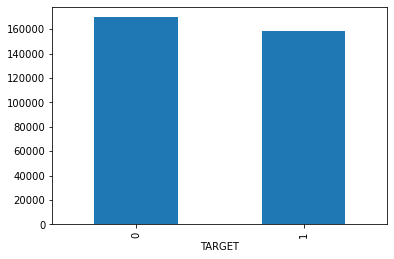

In [76]:
#对下面的结果做成可视化图表：
df.groupby("TARGET")["AMT_INCOME_TOTAL"].mean().plot(kind='bar')

In [77]:
df.groupby("TARGET")["AMT_INCOME_TOTAL"].mean()

TARGET
0    169709.203292
1    158528.551056
Name: AMT_INCOME_TOTAL, dtype: float64

In [78]:
#将结果转化成DataFrame, 方便做图：
income_by_target= pd.DataFrame(df.groupby("TARGET", as_index = False)["AMT_INCOME_TOTAL"].mean())
income_by_target

,TARGET,AMT_INCOME_TOTAL
0,0,169709.203292
1,1,158528.551056


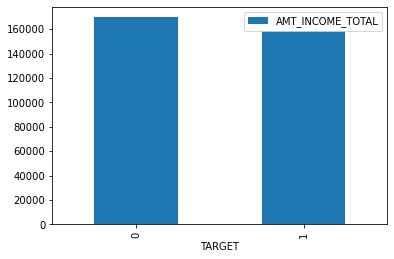

In [79]:
#使用matplotlib中的.plot()制作图表：
my_plot = income_by_target.plot(x="TARGET", y="AMT_INCOME_TOTAL",kind="bar")

使用matplotlib.pyplot作图

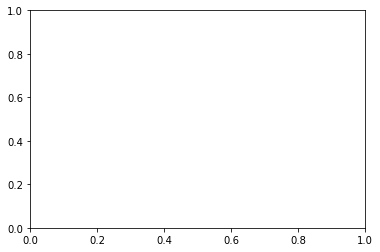

In [80]:
#作图准备
fig, ax = plt.subplots()
plt.show()

In [81]:
#添加数据
df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean()

NAME_FAMILY_STATUS
Civil marriage          561538.670659
Married                 649611.770075
Separated               566371.422170
Single / not married    486995.640845
Widow                   483169.028384
Name: AMT_CREDIT, dtype: float64

In [82]:
df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean().index

Index(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'],
      dtype='object', name='NAME_FAMILY_STATUS')

In [85]:
df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean()

NAME_FAMILY_STATUS
Civil marriage          561538.670659
Married                 649611.770075
Separated               566371.422170
Single / not married    486995.640845
Widow                   483169.028384
Name: AMT_CREDIT, dtype: float64

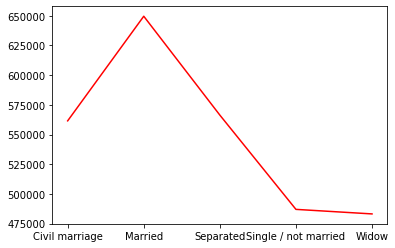

In [86]:
fig, ax = plt.subplots()
ax.plot(df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean(), color='red')
plt.show()

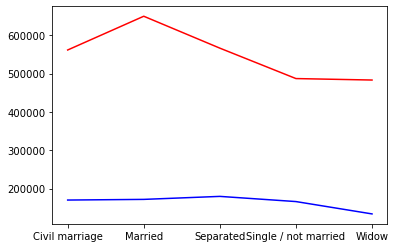

In [87]:
fig, ax = plt.subplots()
ax.plot(df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean(), color='red')
ax.plot(df.groupby(['NAME_FAMILY_STATUS'])['AMT_INCOME_TOTAL'].mean(), color='blue')
plt.show()

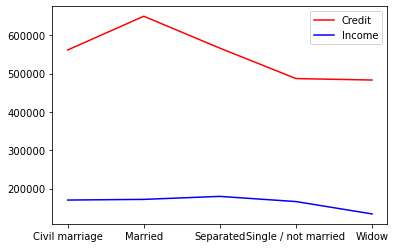

In [88]:
fig, ax = plt.subplots()
ax.plot(df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].mean(), color='red', label='Credit')
ax.plot(df.groupby(['NAME_FAMILY_STATUS'])['AMT_INCOME_TOTAL'].mean(), color='blue', label='Income')
ax.legend()
plt.show()

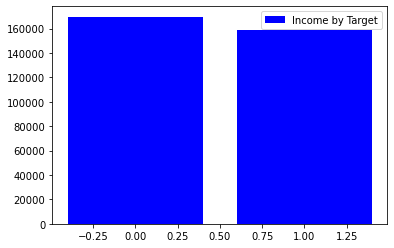

In [89]:
fig, ax = plt.subplots()
ax.bar(df.groupby("TARGET")["AMT_INCOME_TOTAL"].mean().index,
       df.groupby("TARGET")["AMT_INCOME_TOTAL"].mean(), color='blue', label='Income by Target')
ax.legend()
plt.show()

**将DataFrame导出到外部csv文件**

和pandas.read_csv()正好相反, Pandas中的函数**DataFrame.to_csv()**可以将DataFrame导出到外部，并写入csv文件：

    - 第一个参数: 导出后的文件名或者含有文件名的路径
    - 如果有相同名字的已经文件存在，则会被覆盖
    - 参数sep用来指定导出CSV文件中每列的分隔符
    - 参数index默认时等于True代表会在导出的文件中写入行的索引名字。实际工作中使用index=False去除csv中的行索引

In [90]:
income_by_target.to_csv('income_by_target.csv')

In [91]:
income_by_target.to_csv('income_by_target_withoutindex.csv' index=False, sep='|')

再次读入比较区别：

In [92]:
df1 = pd.read_csv('income_by_target.csv')
df1

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HIGH_INCOME,Credit_to_Income
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,2.007889
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.790750
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,2.000000
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,2.316167
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,8.647059
3547,3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,4.444444
3548,3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,1.918800
3549,3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False,2.938947


In [93]:
df2 = pd.read_csv('income_by_target.csv', index_col=0)
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HIGH_INCOME,Credit_to_Income
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,2.007889
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.790750
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,2.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,2.316167
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,8.647059
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,4.444444
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,1.918800
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False,2.938947


In [94]:
df_withoutIndex = pd.read_csv('income_by_target_withoutindex.csv', sep='|')
df_withoutIndex

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HIGH_INCOME,Credit_to_Income
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,2.007889
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.790750
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,2.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,2.316167
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,104143,0,Cash loans,F,N,Y,0,76500.0,661500.0,25632.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,8.647059
3547,104144,0,Cash loans,M,Y,N,2,202500.0,900000.0,26316.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,4.444444
3548,104145,0,Cash loans,F,N,Y,0,45000.0,86346.0,8541.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,1.918800
3549,104146,0,Cash loans,M,Y,Y,1,85500.0,251280.0,12960.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False,2.938947


**Python的价值不在Python语言本身，而在于使用Python去解决商业/数据分析中的实际问题**